In [11]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [4]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Doctor.csv')
df.head()

,doctor,children,access,health
0,0,1,0.50,0.495
1,1,3,0.17,0.520
2,0,4,0.42,-1.227
3,0,2,0.33,-1.524
4,11,1,0.67,0.173


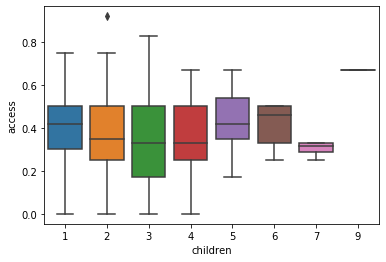

In [17]:
#number of children in a household compared to the access they have to healthcare
sns.boxplot("children", "access", data=df)
plt.show()

In [9]:
#health_n = individuals who are not healthy
#health_y = individuals who are healthy
#health determined by having a positive or negative health value. Negative means healthy, positive means not healthy
health_n = df[df['health'] > 0]
health_y = df[df['health'] <= 0]

In [7]:
health_y.head()

,doctor,children,access,health
0,0,1,0.50,0.495
1,1,3,0.17,0.520
4,11,1,0.67,0.173
7,6,1,0.67,0.656
10,1,1,0.50,0.359


In [8]:
health_n.head()

,doctor,children,access,health
2,0,4,0.42,-1.227
3,0,2,0.33,-1.524
5,3,1,0.25,-0.905
6,0,2,0.50,-1.202
8,1,1,0.25,-1.227


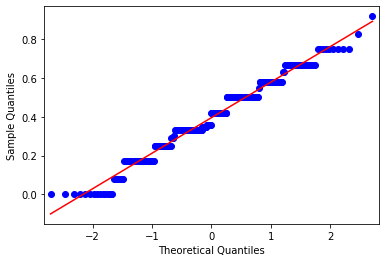

In [12]:
qqplot(health_y["access"], line="s")
plt.show()

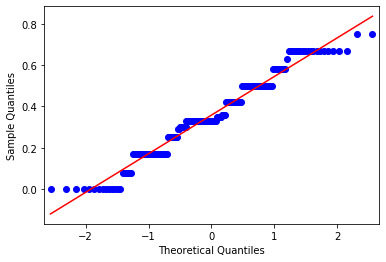

In [13]:
qqplot(health_n["access"], line="s")
plt.show()

In [19]:
_, p = stats.kruskal(health_y["access"], health_n["access"])
p < 0.05

True

In [21]:
_, p1 = stats.mannwhitneyu(health_y["access"], health_n["access"])

p_value = [p1]
p_value

[0.015092288998510875]

In [22]:
reject, corr_p, sidak, bonf = multipletests(p_values, alpha=0.05)
reject

array([ True])